In [2]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from numpy import eye
from LoadMZML import LoadMZML
from OptimalMz import OptimalMz
from PlotImage import PlotImage
from TemplateOverlay import TemplateOverlay
% matplotlib inline

# Parameters

In [3]:
class Parameters:
    def __init__(self):
        #  self.filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
        self.filename = '..\\data\\abcdefgh_1.mzML'
        self.lines = 8
        self.widthInMM = 62
        self.heightInMM = 10
        self.downMotionInMM = 1.25
        
template_path = '..\\data\\abcdef.png'
generated_b = 137
generated_e = 462
template_b = 343
template_e = 1180
plotValues = (374, 376)

Used to find parameters

In [4]:
#PlotImage(loadMZML, param).save("abcdef_gen",plotValues)

In [5]:
param = Parameters()
loadMZML = LoadMZML(param)
plotImage = PlotImage(loadMZML, param)
templateOverlay = TemplateOverlay(loadMZML, param)

Template Image

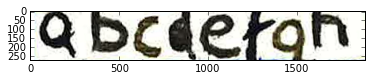

In [6]:
template = Image.open(template_path)
plt.figure()
plt.imshow(np.asarray(template))

Black and White

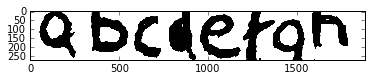

In [7]:
template = templateOverlay.RGBtoBW(template_path)
plt.figure()
plt.imshow(np.asarray(template), cmap='Greys_r')

# Overlay template and generated

100%
51.59s


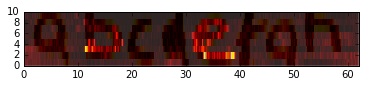

In [8]:
#Scale Template
template = templateOverlay.alignTemplate(generated_b, generated_e, template_b, template_e, template)
#Shift generated
generated = templateOverlay.alignGenerated(generated_b, generated_e, template_b, template_e, plotValues)
#Make both the same size
template, generated = templateOverlay.alignment(template, generated)

plt.figure()
plt.imshow(np.asarray(generated), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot')
plt.imshow(np.asarray(template), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot',
           alpha=0.15)  # 0 fully transparent

# Calculate optimal mass based on template

100%
134.26s
i1 - i:
[-149.04554891 -100.87616475  -51.40230309  -30.92354803  -29.85108897]

mz:
[(375.0, 376.0), (325.0, 326.0), (376.0, 377.0), (315.0, 316.0), (419.0, 420.0)]

i:
[ 391.7451534   211.58573257  153.44847363  309.5527015   257.378278  ]
i1:
[ 242.69960449  110.70956781  102.04617054  278.62915347  227.52718903]
c:
[31087 13930 11295 28995 25042]
c1:
[58606 18420 16390 60011 48916]
range:
1.0
100%
13.59s
100%
15.32s
100%
27.86s
100%
29.98s
100%
29.41s


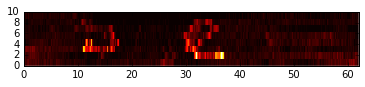

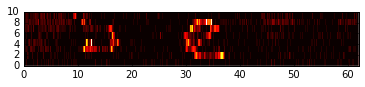

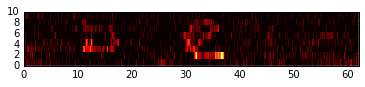

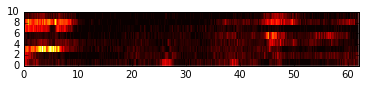

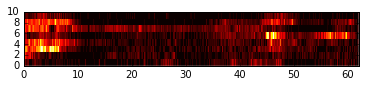

In [9]:
# Calculate optimal mass based on template
optimalMz = OptimalMz.V2(loadMZML, mzRangeLower=300, mzRangeHighest=500, resolution=200,
                         templateClass=templateOverlay)
optimalMz.printN()
for i, j in optimalMz.getN():
    plotImage.plotImshowII((i, j))